In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from dateutil.relativedelta import relativedelta
from functions_used import months_between

In [2]:
warnings.filterwarnings('ignore') # to supress warnings

In [3]:
sns.set()

In [4]:
loan_dataset = pd.read_csv('dataset/loan1.csv') # Loading updated data.

### **Note:- In pandas and NumPy, dtype('O') stands for "Object data type". It typically refers to columns that contains Strings or text, Mixed types (e.g., numbers + text), and Python objects (lists, dicts, etc.).**


In [5]:
pd.options.display.max_rows = None

loan_dataset.dtypes # To get the datatype of the values stored in each column.
# dataset['loan_amnt'].dtype # for individual colum

funded_amnt                                     int64
term                                           object
int_rate                                      float64
installment                                   float64
grade                                          object
sub_grade                                      object
emp_title                                      object
emp_length                                     object
home_ownership                                 object
annual_inc                                    float64
verification_status                            object
issue_d                                        object
loan_status                                    object
pymnt_plan                                     object
desc                                           object
purpose                                        object
title                                          object
zip_code                                       object
addr_state                  

### **Preprocessing:-** In the given dataset, several variables (columns) are represented with incorrect data types and values (such as nan). Hence, they need to be preprocessed before we can use them in our model. These variables are listed below,

---
> **emp_length:-** represented as object data type (dtype('O')). However, it should hold numeric values.
>
> **term:-** represented as object data type (dtype('O')). However, it should hold numeric values.
>
> **earliest_cr_line:-** represented as object data type (dtype('O')). However, it should hold time stamps.
>
> **issue_d:-** represented as object data type (dtype('O')). However, it should hold time stamps.

---
###### 
- ### **emp_length**

In [6]:
# To get all unique values from a single column.

loan_dataset['emp_length'].unique()

array(['10+ years', '6 years', '4 years', '< 1 year', '2 years',
       '9 years', nan, '5 years', '3 years', '7 years', '1 year',
       '8 years'], dtype=object)

In [7]:
# Note, we have some nan values in our 'emp_length', and these values can't be converted into valid years. 

# count = 0
# for i in dataset['earliest_cr_line']:
#     if pd.isna(i):
#         count += 1

nan_count = loan_dataset['emp_length'].isna().sum() # to get nan count
nan_count 

np.int64(146907)

### Employement length is missing for 146907 records, we can't drop them and neither can we impute them directly with zeros. So, we will create an indicator variable (new column with 1 (when employement length is missing) and 0 (when employement length is not missing)). Then, in the main column, we can impute zero for missing values. This way, we have created an specific indicator for our model to highlight missing values.

In [8]:
loan_dataset['emp_length_int'] = loan_dataset['emp_length'].str.replace('+ years', '')
loan_dataset['emp_length_int'] = loan_dataset['emp_length_int'].str.replace('< 1 year', str(0))
loan_dataset['emp_length_int'] = loan_dataset['emp_length_int'].str.replace('years', '')
loan_dataset['emp_length_int'] = loan_dataset['emp_length_int'].str.replace('year', '')

In [9]:
loan_dataset['emp_length_missing'] = loan_dataset['emp_length_int'].isna().astype(int)

loan_dataset['emp_length_int'] = loan_dataset['emp_length_int'].fillna('0') # or use ..... dataset['emp_length_int'].fillna('0', inplace=True)

loan_dataset['emp_length_int'].unique()

array(['10', '6 ', '4 ', '0', '2 ', '9 ', '5 ', '3 ', '7 ', '1 ', '8 '],
      dtype=object)

In [10]:
loan_dataset['emp_length_int'] = pd.to_numeric(loan_dataset['emp_length_int']) # converting string to numeric value.
loan_dataset['emp_length_int'].unique(), loan_dataset['emp_length_int'].dtype 

(array([10,  6,  4,  0,  2,  9,  5,  3,  7,  1,  8]), dtype('int64'))

- ### **term**

In [11]:
loan_dataset['term'].unique() # The values are in months.

array([' 36 months', ' 60 months'], dtype=object)

In [12]:
loan_dataset['term_int'] = loan_dataset['term'].str.replace(' 36 months', '36')
loan_dataset['term_int'] = loan_dataset['term_int'].str.replace(' 60 months', '60')
loan_dataset['term_int'] = pd.to_numeric(loan_dataset['term_int']) # converting string to numeric value.
loan_dataset['term_int'].unique(), loan_dataset['term_int'].dtype 

(array([36, 60]), dtype('int64'))

- ### **earliest_cr_line**

In [13]:
loan_dataset['earliest_cr_line'].unique()

array(['Apr-2001', 'Jun-1987', 'Apr-2011', 'Feb-2006', 'Dec-2000',
       'Sep-2002', 'Nov-2004', 'Nov-1997', 'Aug-1998', 'Apr-2002',
       'May-2007', 'Dec-2003', 'Jun-2003', 'Oct-2008', 'Jul-1990',
       'Dec-1988', 'Dec-2002', 'Oct-2010', 'Jul-2005', 'Feb-2001',
       'Dec-2004', 'Oct-2001', 'Sep-2003', 'Oct-2004', 'Sep-2010',
       'Oct-1999', 'Feb-1997', 'Jan-1995', 'Aug-2005', 'Apr-2005',
       'Oct-2005', 'Nov-2006', 'Sep-1999', 'Sep-2006', 'Aug-1996',
       'May-2015', 'Nov-1999', 'Dec-1998', 'Aug-1989', 'Apr-2012',
       'Sep-2012', 'Jan-2011', 'Jul-2013', 'Sep-2011', 'Aug-1999',
       'Dec-1991', 'Nov-2007', 'Oct-2007', 'Jul-1986', 'Nov-2014',
       'Apr-1995', 'Jul-1992', 'Aug-2006', 'Oct-1988', 'Feb-2005',
       'Aug-2002', 'Oct-2003', 'Apr-2004', 'Jun-2007', 'Aug-1990',
       'Dec-1990', 'Jul-1997', 'Sep-1988', 'Sep-2008', 'Feb-1999',
       'Apr-2007', 'Aug-2004', 'Dec-2006', 'Mar-2007', 'Oct-2006',
       'Jul-2014', 'May-2005', 'Jun-1995', 'Mar-2014', 'Feb-20

In [14]:
# loan_dataset.loc[loan_dataset['earliest_cr_line'].isna()] # records where earliest cr_line is NAN.

In [15]:
# Counting the records where 'earliest_cr_line' is NA.

nan_count = loan_dataset['earliest_cr_line'].isna().sum() # to get nan count
len(loan_dataset), nan_count # So, we have 29 records where earliest_cr_line is not given.

(2260668, np.int64(29))

In [16]:
type(loan_dataset['earliest_cr_line'][0]) # The values are store as objects (strings). So, we need to change them into time stamps.

str

In [17]:
loan_dataset['earliest_cr_line_timestamp'] = pd.to_datetime(loan_dataset['earliest_cr_line'], format='%b-%Y') 

###  **Format Breakdown**
> %b — Abbreviated month name (e.g., Jan, Feb, ..., Dec)
> 
> %Y — Four-digit year

In [18]:
type(loan_dataset['earliest_cr_line_timestamp'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [19]:
'''Note:- Pandas needs to assign some default day value to construct a full datetime object (YYYY-MM-DD) and if the day
          is not provided in the string, it assumes the first day of the month.'''

loan_dataset['earliest_cr_line_timestamp'][0]

Timestamp('2001-04-01 00:00:00')

### Now, we have the dates on which the earliest credit lines were issued. However, for a credit risk model, what we actually need is the time that has passed since the earliest credit line was issued. To calculate this, we should define a reference date. Typically **current date** is set as the reference date.

In [20]:
# Example reference date
reference_date = pd.to_datetime('2025-07-30') # We could have also used "pd.to_datetime('today')", but fixing date for reproducability.

In [21]:
# relativedelta returns the difference between two timestamps in years, months, and days.

rd = relativedelta(pd.to_datetime('2025-07-30'), pd.to_datetime('2001-04-01'))
rd

relativedelta(years=+24, months=+3, days=+29)

In [22]:
# They can be accessed like

rd.years, rd.months, rd.days

(24, 3, 29)

In [23]:
# Apply to our dataframe column
loan_dataset['months_since_earliest_cr_line'] = loan_dataset['earliest_cr_line_timestamp'].apply(lambda x: months_between(x, reference_date))

In [24]:
loan_dataset['months_since_earliest_cr_line'].describe()

count    2.260668e+06
mean     3.076852e+02
std      9.417307e+01
min      0.000000e+00
25%      2.430000e+02
50%      2.920000e+02
75%      3.570000e+02
max      1.109000e+03
Name: months_since_earliest_cr_line, dtype: float64

- ### **issue_d**

In [25]:
loan_dataset['issue_d'].unique()

array(['Dec-2018', 'Nov-2018', 'Oct-2018', 'Sep-2018', 'Aug-2018',
       'Jul-2018', 'Jun-2018', 'May-2018', 'Apr-2018', 'Mar-2018',
       'Feb-2018', 'Jan-2018', 'Sep-2016', 'Aug-2016', 'Jul-2016',
       'Jun-2016', 'May-2016', 'Apr-2016', 'Mar-2016', 'Feb-2016',
       'Jan-2016', 'Dec-2016', 'Nov-2016', 'Oct-2016', 'Dec-2015',
       'Nov-2015', 'Oct-2015', 'Sep-2015', 'Aug-2015', 'Jul-2015',
       'Jun-2015', 'May-2015', 'Apr-2015', 'Mar-2015', 'Feb-2015',
       'Jan-2015', 'Mar-2017', 'Feb-2017', 'Jan-2017', 'Sep-2017',
       'Aug-2017', 'Jul-2017', 'Jun-2017', 'May-2017', 'Apr-2017',
       'Dec-2013', 'Nov-2013', 'Oct-2013', 'Sep-2013', 'Aug-2013',
       'Jul-2013', 'Jun-2013', 'May-2013', 'Apr-2013', 'Mar-2013',
       'Feb-2013', 'Jan-2013', 'Dec-2012', 'Nov-2012', 'Oct-2012',
       'Sep-2012', 'Aug-2012', 'Jul-2012', 'Jun-2012', 'May-2012',
       'Apr-2012', 'Mar-2012', 'Feb-2012', 'Jan-2012', 'Dec-2014',
       'Nov-2014', 'Oct-2014', 'Sep-2014', 'Aug-2014', 'Jul-20

> ### **Note:** There are **0** NAN values.

In [26]:
# reference date was set to '2025-07-30'.
loan_dataset['issue_d_timestamp'] = pd.to_datetime(loan_dataset['issue_d'], format='%b-%Y') # converting to month and year format.
loan_dataset['months_since_issue_date'] = loan_dataset['issue_d_timestamp'].apply(lambda x: months_between(x, reference_date))
loan_dataset['months_since_issue_date'].describe()

count    2.260668e+06
mean     1.109544e+02
std      2.161178e+01
min      8.000000e+01
25%      9.300000e+01
50%      1.090000e+02
75%      1.240000e+02
max      2.180000e+02
Name: months_since_issue_date, dtype: float64

## **Missing values**

In [27]:
# Using this we can get the number of missing values in each column.

pd.options.display.max_rows = None
loan_dataset.isnull().sum()

funded_amnt                                         0
term                                                0
int_rate                                            0
installment                                         0
grade                                               0
sub_grade                                           0
emp_title                                      166969
emp_length                                     146907
home_ownership                                      0
annual_inc                                          4
verification_status                                 0
issue_d                                             0
loan_status                                         0
pymnt_plan                                          0
desc                                          2134603
purpose                                             0
title                                           23326
zip_code                                            1
addr_state                  

### **Several columns in our dataset have missing values, but we will only focus on the important columns like,**

> total_rev_hi_lim
>
>annual_inc
>
> acc_now_delinq
>
> total_acc
>
> pub_rec
>
> open_acc
>
> inq_last_6mths
>
> delinq_2yrs
>
> 'installment'

---

- ### **total_rev_hi_lim**

In [28]:
loan_dataset['total_rev_hi_lim'].isnull().sum() # A total of 70276 values are missing.

np.int64(70276)

In [29]:
loan_dataset['total_rev_hi_lim'].skew() # Right-skewed (long tail on the right)

np.float64(32.55742738174407)

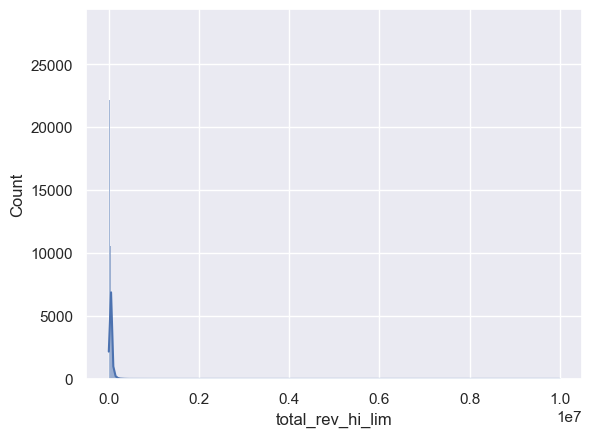

In [30]:
sns.histplot(loan_dataset['total_rev_hi_lim'], kde=True)
plt.show()

In [31]:
# Using median() to impute the missing values in 'total_rev_hi_lim', as the data is heavily right skewed.

loan_dataset['total_rev_hi_lim'].fillna(loan_dataset['total_rev_hi_lim'].median(), inplace =  True) 

In [32]:
loan_dataset['total_rev_hi_lim'].isnull().sum() 

np.int64(0)

---

- ### **annual_inc**

In [33]:
loan_dataset['annual_inc'].isnull().sum() # Just 4 values are missing.

np.int64(4)

In [34]:
loan_dataset['annual_inc'].skew() # Right-skewed (long tail on the right), so again using median.

np.float64(493.88608839994697)

In [35]:
loan_dataset['annual_inc'].fillna(loan_dataset['annual_inc'].median(), inplace =  True)
loan_dataset['annual_inc'].isnull().sum()

np.int64(0)

In [36]:
(loan_dataset['acc_now_delinq'].isnull().sum(), 
loan_dataset['pub_rec'].isnull().sum(), 
loan_dataset['inq_last_6mths'].isnull().sum(), 
loan_dataset['delinq_2yrs'].isnull().sum(), 
loan_dataset['total_acc'].isnull().sum(), 
loan_dataset['open_acc'].isnull().sum(), 
loan_dataset['earliest_cr_line'].isnull().sum())

(np.int64(29),
 np.int64(29),
 np.int64(30),
 np.int64(29),
 np.int64(29),
 np.int64(29),
 np.int64(29))

In [37]:
print(loan_dataset[loan_dataset['acc_now_delinq'].isnull()].index)

Index([2141934, 2141935, 2141944, 2141957, 2141965, 2141968, 2141979, 2141994,
       2141999, 2142000, 2142001, 2142002, 2142003, 2142004, 2142005, 2142006,
       2142007, 2142008, 2142009, 2142010, 2142011, 2142012, 2142013, 2142014,
       2142015, 2142016, 2142017, 2142018, 2142019],
      dtype='int64')


In [38]:
print(loan_dataset[loan_dataset['pub_rec'].isnull()].index)

Index([2141934, 2141935, 2141944, 2141957, 2141965, 2141968, 2141979, 2141994,
       2141999, 2142000, 2142001, 2142002, 2142003, 2142004, 2142005, 2142006,
       2142007, 2142008, 2142009, 2142010, 2142011, 2142012, 2142013, 2142014,
       2142015, 2142016, 2142017, 2142018, 2142019],
      dtype='int64')


In [39]:
print(loan_dataset[loan_dataset['inq_last_6mths'].isnull()].index)

Index([ 808511, 2141934, 2141935, 2141944, 2141957, 2141965, 2141968, 2141979,
       2141994, 2141999, 2142000, 2142001, 2142002, 2142003, 2142004, 2142005,
       2142006, 2142007, 2142008, 2142009, 2142010, 2142011, 2142012, 2142013,
       2142014, 2142015, 2142016, 2142017, 2142018, 2142019],
      dtype='int64')


In [40]:
print(loan_dataset[loan_dataset['delinq_2yrs'].isnull()].index)

Index([2141934, 2141935, 2141944, 2141957, 2141965, 2141968, 2141979, 2141994,
       2141999, 2142000, 2142001, 2142002, 2142003, 2142004, 2142005, 2142006,
       2142007, 2142008, 2142009, 2142010, 2142011, 2142012, 2142013, 2142014,
       2142015, 2142016, 2142017, 2142018, 2142019],
      dtype='int64')


In [41]:
print(loan_dataset[loan_dataset['total_acc'].isnull()].index)

Index([2141934, 2141935, 2141944, 2141957, 2141965, 2141968, 2141979, 2141994,
       2141999, 2142000, 2142001, 2142002, 2142003, 2142004, 2142005, 2142006,
       2142007, 2142008, 2142009, 2142010, 2142011, 2142012, 2142013, 2142014,
       2142015, 2142016, 2142017, 2142018, 2142019],
      dtype='int64')


In [42]:
print(loan_dataset[loan_dataset['open_acc'].isnull()].index)

Index([2141934, 2141935, 2141944, 2141957, 2141965, 2141968, 2141979, 2141994,
       2141999, 2142000, 2142001, 2142002, 2142003, 2142004, 2142005, 2142006,
       2142007, 2142008, 2142009, 2142010, 2142011, 2142012, 2142013, 2142014,
       2142015, 2142016, 2142017, 2142018, 2142019],
      dtype='int64')


In [43]:
print(loan_dataset[loan_dataset['earliest_cr_line'].isna()].index)

Index([2141934, 2141935, 2141944, 2141957, 2141965, 2141968, 2141979, 2141994,
       2141999, 2142000, 2142001, 2142002, 2142003, 2142004, 2142005, 2142006,
       2142007, 2142008, 2142009, 2142010, 2142011, 2142012, 2142013, 2142014,
       2142015, 2142016, 2142017, 2142018, 2142019],
      dtype='int64')


### 🔍 Explanation

#### With the exception of one additional missing value for the variable **`inq_last_6mths`**, all other missing values correspond to the same 29 records. Since these missing values occur in the same rows, it is reasonable to infer that these customers likely had **no prior credit history**.

Record **808511** has only **`inq_last_6mths`** missing, which could simply indicate **no inquiries in the last 6 months**. Hence, imputing zero is justifiable.

---

#### As such, we impute the following:

- **`acc_now_delinq` = 0** → Current delinquencies on accounts. Missing likely implies **no delinquencies**.
- **`pub_rec` = 0** → Number of derogatory public records. Missing likely means **no public records**.
- **`inq_last_6mths` = 0 or left as missing** → Number of credit inquiries in the last 6 months. Missing likely implies **no recent inquiries**.
- **`delinq_2yrs` = 0 or left as missing** → Delinquencies in the past 2 years. Missing likely means **none**.
- **`open_acc` = 0** → No currently open accounts.
- **`total_acc` = 0** → No total number of accounts.
- **`earliest_cr_line` = 0 or left as missing** → Likely that **no credit line was ever established**.

---

This consistent missingness pattern justifies imputing **zero** for these variables for the identified 29 records.


In [44]:
# Relacing the missing values with zeroes.

loan_dataset['delinq_2yrs'].fillna(0, inplace=True)
loan_dataset['inq_last_6mths'].fillna(0, inplace=True)
loan_dataset['pub_rec'].fillna(0, inplace=True)
loan_dataset['acc_now_delinq'].fillna(0, inplace=True)
loan_dataset['total_acc'].fillna(0, inplace=True)
loan_dataset['open_acc'].fillna(0, inplace=True)

# 'earliest_cr_line' was set to zero before.

In [45]:
# 'installment' doesn't have any missing values()

loan_dataset['installment'].isnull().sum()

np.int64(0)

---
### To use logistic regression, we need to define a "default" class, especially in binary classification problems like credit risk modeling, where we’re predicting whether a borrower defaults (0) or does not default (1). **A common default definition states that a borrower has defaulted if they are 30 or more days past the due date.**

### Note: In our dataset, the variable **loan_status** can be used to create the target variable for our logistic regression model, indicating whether a borrower defaulted (0) or did not default (1).

In [46]:
len(loan_dataset['loan_status'].unique()), loan_dataset['loan_status'].unique()

(9,
 array(['Current', 'Fully Paid', 'Late (31-120 days)', 'In Grace Period',
        'Charged Off', 'Late (16-30 days)', 'Default',
        'Does not meet the credit policy. Status:Fully Paid',
        'Does not meet the credit policy. Status:Charged Off'],
       dtype=object))

## Aforementioned terms can be interpreted as

- Fully paid: No default (1)
- Current: No default (1)
- In Grace Period: No default (1)
- Late (16-30 days): No default (1)
- Does not meet the credit policy. Status:Fully Paid: No default (1)
  
- Charged Off: Default (0)
- Default: Default (0)
- Late (31-120 days): Default (0)
- Does not meet the credit policy. Status:Charged Off: Default (0)

In [47]:
loan_dataset['loan_status'].value_counts()

loan_status
Fully Paid                                             1041952
Current                                                 919695
Charged Off                                             261655
Late (31-120 days)                                       21897
In Grace Period                                           8952
Late (16-30 days)                                         3737
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     31
Name: count, dtype: int64

In [48]:
# Getting the proportion of each category w.r.t total records

loan_dataset['loan_status'].value_counts() / loan_dataset['loan_status'].count() 

loan_status
Fully Paid                                             0.460904
Current                                                0.406824
Charged Off                                            0.115742
Late (31-120 days)                                     0.009686
In Grace Period                                        0.003960
Late (16-30 days)                                      0.001653
Does not meet the credit policy. Status:Fully Paid     0.000879
Does not meet the credit policy. Status:Charged Off    0.000337
Default                                                0.000014
Name: count, dtype: float64

In [49]:
(0.460904 + 0.406824 + 0.003960 + 0.000337)*100

87.2025

### apprx 87.2% of the total loans are paid on time.
> Fully Paid (0.460904)
> 
> Current (0.406824)
> 
> In Grace Period (0.003960)
> 
>  Does not meet the credit policy. Status:Fully Paid (0.000337)

In [50]:
loan_dataset['good_bad'] = np.where(loan_dataset['loan_status'].isin(['Charged Off',
                                                                      'Default',
                                                                      'Late (31-120 days)',
                                                                      'Does not meet the credit policy. Status:Charged Off']), 0, 1)

In [51]:
loan_dataset['good_bad'].value_counts() # 21897 + 261655 + 761 + 31 = 284344

good_bad
1    1976324
0     284344
Name: count, dtype: int64

### **Splitting the data into training and testing datasets**

In [52]:
train_input, test_input, train_output, test_output = train_test_split(loan_dataset.drop('good_bad', axis=1), 
                                                                        loan_dataset['good_bad'],
                                                                        test_size=0.2,            # e.g., 20% for testing
                                                                        random_state=42,          # ensures reproducibility
                                                                        stratify=loan_dataset['good_bad']  # optional: for imbalanced classes
                                                                    )

In [53]:
train_input.shape, train_output.shape

((1808534, 147), (1808534,))

In [54]:
test_input.shape, test_output.shape

((452134, 147), (452134,))

### **Note:**

We split the dataset into training and testing sets at this stage to save resources and simplify processing. Since we only need the labels from the test data for final model evaluation, there is no need to perform preprocessing (like encoding or imputing) on the test set until the model is ready.

> This avoids unnecessary computation and helps focus preprocessing efforts only on the training data, which the model learns from.



In [55]:
# To save the current version of our dataset.

train_input.to_csv('dataset/train_input.csv', index=False) 
test_input.to_csv('dataset/test_input.csv', index=False) 
train_output.to_csv('dataset/train_output.csv', index=False) 
test_output.to_csv('dataset/test_output.csv', index=False) 